In [48]:
# 히스토그램: 계급별로 나눠 개수 확인하기
# bins:  구간을 나누는 기준 설정
# 연속형 데이터 -> 범주형 데이터로 분류.. 새로운 feature를 생성 -- Feature Enginiering
# 데이터 분석 or 학습할 때 다양한 데이터의 특성을 찾아 추가

In [49]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [50]:
df.info() #column 3이 object ?? -> 뭔가 오류가 있겠군

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [51]:
df[3][0] #문자열

'130.0'

In [52]:
for idx, data in enumerate(df[3]):
    try:
        float(data.strip())
    except Exception as e:
        print(e)

could not convert string to float: '?'
could not convert string to float: '?'
could not convert string to float: '?'
could not convert string to float: '?'
could not convert string to float: '?'
could not convert string to float: '?'


In [53]:
df[3] = df[3].replace('?', pd.NA)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       392 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


<Axes: >

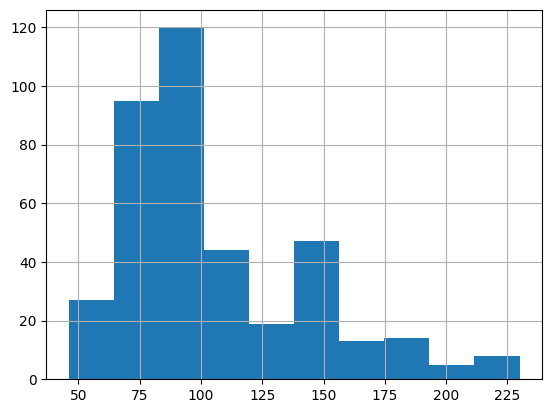

In [55]:
# 결측치 제거
df[3] = df[3].dropna()
df[3] = df[3].astype('float')

df[3].hist(bins=10)

`df[3].dropna()` 과 `df.dropna(subset=[3])`의 차이
1. `df[3].dropna()`
해당 열만 시리즈로 변환, 다른 열은 사라짐, shape (2,) -> Series => 특정 칼럼만 쓰고싶을 때

2. `df.dropna(subset=[3])`
NaN이 있는 행 전체 삭제, shape (2, 2) -> Dataframe => 데이터 분석에 안전

In [67]:
# 구간을 직접 지정 -> domain 지식이 있을 때 사용
# 마력 low / medium / high
import numpy as np
cnt, bins = np.histogram(df[3].dropna(), bins=3)
print(cnt, bins)
labels = ['low', 'medium', 'high']

df['power'] = pd.cut(df[3],
       bins = bins,
       labels = labels
       )

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


In [68]:
# 분위수 기반으로 동일한 개수로 분할
# 각 구간별 샘플개수가 비슷
# 구간폭이 일정하지 않음
labels = ['low', 'medium', 'high']

df['q-power'] = pd.qcut(df[3],q=3,labels=labels)

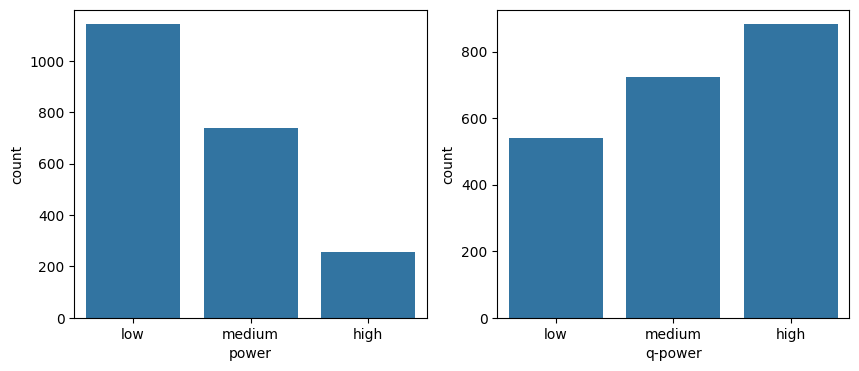

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1,2, figsize=(10,4))
sns.countplot(data=df, x='power', ax=ax[0])
sns.countplot(data=df, x='q-power', ax=ax[1])

plt.show()


In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df = df.dropna(subset=['horsepower'], axis=0)                 # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# np.histogram 함수로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)
print(bin_dividers)

[ 46.         107.33333333 168.66666667 230.        ]


In [ ]:
# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 

# horsepower 열, hp_bin 열의 첫 15행을 출력
df[['horsepower', 'hp_bin']].head(15)

,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력
